In [1]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder


In [2]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [3]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df


,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [4]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.2)


,support,itemsets
0,0.4,(0)
1,0.4,(1)
2,0.6,(2)
3,0.4,(3)
4,0.2,(4)
...,...,...
146,0.2,"(1, 2, 3, 4, 7)"
147,0.2,"(1, 5, 7, 8, 9)"
148,0.2,"(2, 5, 7, 9, 10)"
149,0.2,"(2, 5, 9, 10, 11)"


In [5]:
frequent_itemsets=apriori(df, min_support=0.2, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets


,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.2,(Necklace)
...,...,...
146,0.2,"(Hat, Necklace, Scarf, Heels, Earrings)"
147,0.2,"(Scarf, Skirt, Shirt, Pants, Earrings)"
148,0.2,"(Hat, Scarf, Sneakers, Skirt, Pants)"
149,0.2,"(Hat, Sneakers, Sunglasses, Skirt, Pants)"


In [6]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dress),(Earrings),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000
1,(Earrings),(Dress),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000
2,(Dress),(Hat),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.800000
3,(Hat),(Dress),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.900000
4,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
1237,(Hat),"(Dress, Necklace, Scarf, Heels, Earrings)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
1238,(Necklace),"(Dress, Hat, Scarf, Heels, Earrings)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
1239,(Scarf),"(Dress, Hat, Necklace, Heels, Earrings)",0.8,0.2,0.2,0.250000,1.250000,0.04,1.066667
1240,(Heels),"(Dress, Hat, Necklace, Scarf, Earrings)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.600000


In [7]:
from mlxtend.frequent_patterns import association_rules 
dlift=association_rules(frequent_itemsets,metric="lift",min_threshold=1.0)
dlift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dress),(Earrings),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000
1,(Earrings),(Dress),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000
2,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
3,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
4,(Dress),(Necklace),0.4,0.2,0.2,0.500000,2.500000,0.12,1.600000
...,...,...,...,...,...,...,...,...,...
1135,(Hat),"(Dress, Necklace, Scarf, Heels, Earrings)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
1136,(Necklace),"(Dress, Hat, Scarf, Heels, Earrings)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
1137,(Scarf),"(Dress, Hat, Necklace, Heels, Earrings)",0.8,0.2,0.2,0.250000,1.250000,0.04,1.066667
1138,(Heels),"(Dress, Hat, Necklace, Scarf, Earrings)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.600000


In [8]:
#from mlxtend.frequent_patterns import association_rules 
#d=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2) # associate itemsets with confidence over 70%.
#d

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dress),(Earrings),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000
1,(Earrings),(Dress),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000
2,(Dress),(Hat),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.800000
3,(Hat),(Dress),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.900000
4,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
1237,(Hat),"(Dress, Necklace, Scarf, Heels, Earrings)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
1238,(Necklace),"(Dress, Hat, Scarf, Heels, Earrings)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
1239,(Scarf),"(Dress, Hat, Necklace, Heels, Earrings)",0.8,0.2,0.2,0.250000,1.250000,0.04,1.066667
1240,(Heels),"(Dress, Hat, Necklace, Scarf, Earrings)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.600000


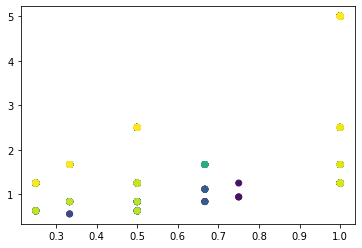

In [9]:
import matplotlib.pyplot as plt 
x=d.confidence
y=d.lift
plt.scatter(x, y,c=d.index)
plt.show()

In [10]:
# we can see that the skirt and pants combination have the highest confidence to lift rate 

In [41]:
import pandas as pd
import numpy as np
data = pd.read_csv("Market_Basket_Optimisation.csv")
# for i in data.columns:
#     for j in data[i]:
#         if j not in data.columns:
#             print (j)
#             j=np.nan
    
data.dropna(axis=1,inplace=True)

In [42]:
data.head()


,shrimp
0,burgers
1,chutney
2,turkey
3,mineral water
4,low fat yogurt


In [43]:
t=TransactionEncoder()
te=t.fit(data).transform(data)    #Apply one-hot-encoding on our dataset
data=pd.DataFrame(te, columns=t.columns_)  #Creating a new DataFrame from our Numpy array
data

,h,i,m,p,r,s
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7495,False,False,False,False,False,False
7496,False,False,False,False,False,False
7497,False,False,False,False,False,False
7498,False,False,False,False,False,False


In [47]:
frequent_itemsets=apriori(data, min_support=0.2, use_colnames=True) 
frequent_itemsets

,support,itemsets
